<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization __[X]__
- Custom stopword removal __[X]__

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

## Import and Introductory

In [1]:
%pwd

'/Users/jonfinger/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [2]:
# Bring in raw data
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)

# Display first 5 rows
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
# Import Packages

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [4]:
# Bring over the handy counting function from lecture
from collections import Counter
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with various statistics like % appears and rank.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [5]:
# Using the helpful lemmatizing function from lecture
def get_lemmas(text):

    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_)
    
    return lemmas

## Cleaning Data

In [6]:
# Removing dates from dataframe using reg ex
new_review = []
for shop in shops['full_review_text']:
    shop = shop.lower().lstrip()
    subbed_sample = (re.sub('[^a-zA-Z ]', '', shop))
    new_review.append(subbed_sample)
shops['review_no_date'] = new_review
shops.head(10)

,coffee_shop_name,full_review_text,star_rating,review_no_date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere every...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in austi...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the e...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating how...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcro...
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,checkin very cute cafe i think from the mome...
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating,checkins listed in nuptial coffee bliss ande...
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating,checkins love this place stars for cleanli...
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,checkin ok lets try this approach pros musi...
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating,checkins this place has been shown on my soc...


In [7]:
#Remove words from star_rating
new_rating = []
for shop in shops['star_rating']:
    subbed_review = re.sub('[^1-9 ]', '', shop)
    subbed_review = int(subbed_review)
    new_rating.append(subbed_review)
shops['pure_rating'] = new_rating
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_no_date,pure_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere every...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in austi...,4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the e...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating how...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcro...,4


## Tokenization & Stop Words

In [8]:
# Load spacy model
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

### Adding custom stopwords

In [9]:
# Adding to stop words
"""
I added 'checkin' since anytime someone checked in, it listed it. 
I also removed a bunch of spacings here to avoid them being kept in as words/tokens.
"""
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'checkin',' ', '  ', '    ', '   '])

In [10]:
# Create spacy review tokens using the tokenizer pipe

tokens = []
for doc in tokenizer.pipe(shops['review_no_date'], batch_size=500):
    
    doc_tokens = []
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)

shops['spaCy_review_tokens'] = tokens

In [11]:
# # Create column of review lemmas for both good and bad

shops['lemmas'] = shops['review_no_date'].apply(get_lemmas)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_no_date,pure_rating,spaCy_review_tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere every...,5,"[love, love, loved, atmosphere, corner, shop, ...","[love, love, love, atmosphere, corner, shop, s..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in austi...,4,"[listed, date, night, austin, ambiance, austin...","[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the e...,4,"[listed, brunch, spots, loved, eclectic, homey...","[list, brunch, spot, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating how...,2,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcro...,4,"[located, northcross, mall, shopping, center, ...","[locate, northcross, mall, shopping, center, f..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count __[X]__
- View Word/Token Counts by Rating __[X]__
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [12]:
# Shape and first five rows of lemmas
wc = count(shops['lemmas'])
print(wc.shape)
wc.head()

(15963, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
112,place,3888,6044,1.0,0.017390,0.017390,0.510504
135,good,3600,5405,2.0,0.015551,0.032941,0.472689
90,not,3055,5175,3.0,0.014890,0.047831,0.401129
65,great,2853,3946,4.0,0.011354,0.059185,0.374606
137,like,2260,3350,5.0,0.009639,0.068823,0.296744


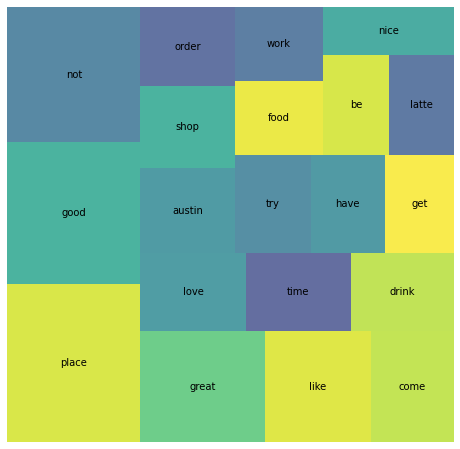

In [13]:
# See a squarify word cloud (top 20) for all reviews combined (good & bad)
wc_top20 = wc[wc['rank'] <= 20]

#Plot squarify word cloud
plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [14]:
# Create a copy of the shops df and add column with good or bad rating
df = shops.copy()
df.loc[df['pure_rating'] >= 3, 'good_bad'] = 'Good'
df.loc[df['pure_rating'] < 3, 'good_bad'] = 'Bad'
print(df.shape)
df.head()

(7616, 8)


,coffee_shop_name,full_review_text,star_rating,review_no_date,pure_rating,spaCy_review_tokens,lemmas,good_bad
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere every...,5,"[love, love, loved, atmosphere, corner, shop, ...","[love, love, love, atmosphere, corner, shop, s...",Good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in austi...,4,"[listed, date, night, austin, ambiance, austin...","[list, date, night, austin, ambiance, austin, ...",Good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the e...,4,"[listed, brunch, spots, loved, eclectic, homey...","[list, brunch, spot, love, eclectic, homey, pl...",Good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating how...,2,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over...",Bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcro...,4,"[located, northcross, mall, shopping, center, ...","[locate, northcross, mall, shopping, center, f...",Good


In [15]:
# Create df for each pure rating
df_1 = df[df['pure_rating'] == 1]
df_2 = df[df['pure_rating'] == 2]
df_3 = df[df['pure_rating'] == 3]
df_4 = df[df['pure_rating'] == 4]
df_5 = df[df['pure_rating'] == 5]

In [16]:
# Create word count for each pure rating
wc_1 = count(df_1['lemmas'])
wc_2 = count(df_2['lemmas'])
wc_3 = count(df_3['lemmas'])
wc_4 = count(df_4['lemmas'])
wc_5 = count(df_5['lemmas'])

## See top words for each review level

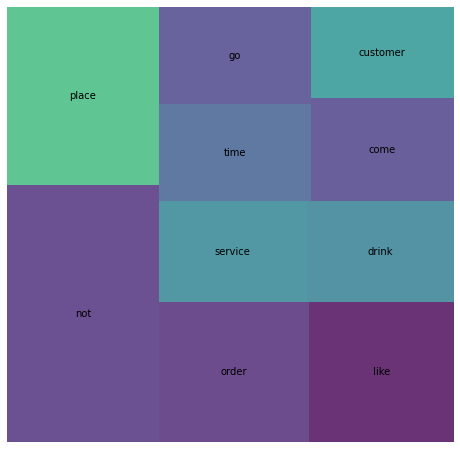

In [17]:
# See a squarify word cloud (top 10) for the 1 star reviews
wc1_top10 = wc_1[wc_1['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc1_top10['pct_total'], label=wc1_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [18]:
# Word count for 1 star reviews
wc_1.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
39,not,163,335,1.0,0.023115,0.023115,0.586331
50,place,140,232,2.0,0.016008,0.039122,0.503597
72,order,94,181,3.0,0.012489,0.051611,0.338129
98,like,104,173,4.0,0.011937,0.063548,0.374101
40,service,94,129,5.0,0.008901,0.072449,0.338129


(0.0, 100.0, 0.0, 100.0)

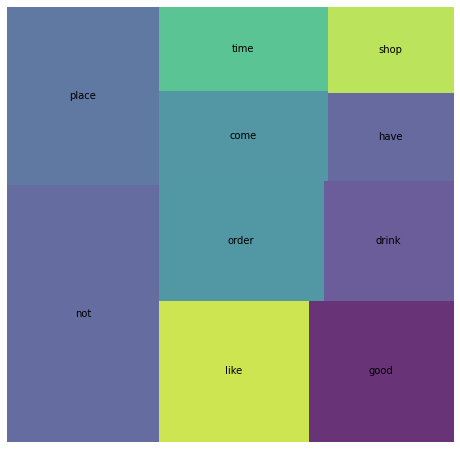

In [19]:
# See a squarify word cloud (top 10) for the 2 star reviews
wc2_top10 = wc_2[wc_2['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc2_top10['pct_total'], label=wc2_top10['word'], alpha=.8 )
plt.axis('off')

In [20]:
# First 5 rows of word count for 2 star reviews
wc_2.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
117,not,270,557,1.0,0.022771,0.022771,0.586957
32,place,233,386,2.0,0.015780,0.038551,0.506522
6,like,189,303,3.0,0.012387,0.050938,0.410870
4,good,208,293,4.0,0.011978,0.062916,0.452174
133,order,156,284,5.0,0.011610,0.074527,0.339130


(0.0, 100.0, 0.0, 100.0)

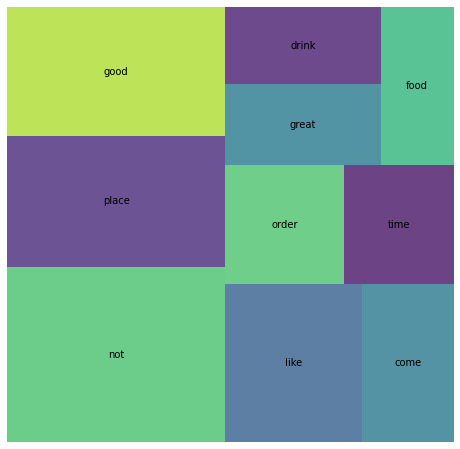

In [21]:
# See a squarify word cloud (top 10) for the 3 star reviews
wc3_top10 = wc_3[wc_3['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc3_top10['pct_total'], label=wc3_top10['word'], alpha=.8 )
plt.axis('off')

In [22]:
# First 5 rows of word count for 3 star reviews
wc_3.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
60,not,435,814,1.0,0.021615,0.021615,0.589431
95,place,382,610,2.0,0.016198,0.037813,0.517615
73,good,358,598,3.0,0.015879,0.053692,0.485095
13,like,299,460,4.0,0.012215,0.065907,0.405149
34,come,220,306,5.0,0.008126,0.074033,0.298103


(0.0, 100.0, 0.0, 100.0)

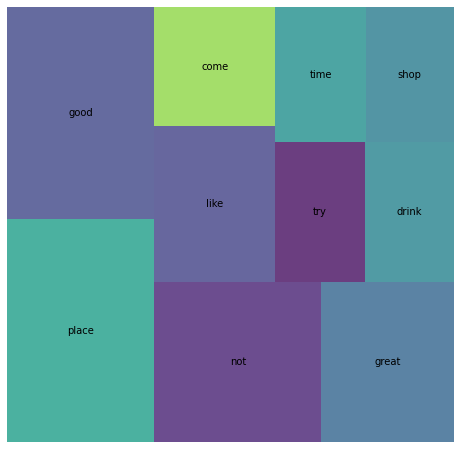

In [23]:
# See a squarify word cloud (top 10) for the 4 star reviews
wc4_top10 = wc_4[wc_4['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc4_top10['pct_total'], label=wc4_top10['word'], alpha=.8 )
plt.axis('off')

In [24]:
# First 5 rows of word count for 4 star reviews
wc_4.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
83,place,1270,2001,1.0,0.017162,0.017162,0.538136
139,good,1233,1913,2.0,0.016407,0.033569,0.522458
60,not,968,1631,3.0,0.013989,0.047558,0.410169
33,great,945,1292,4.0,0.011081,0.058639,0.400424
147,like,775,1150,5.0,0.009863,0.068503,0.328390


(0.0, 100.0, 0.0, 100.0)

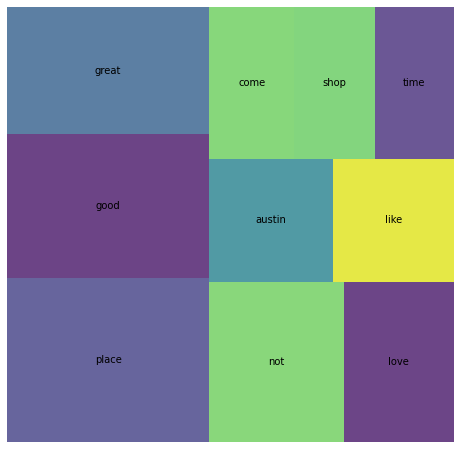

In [25]:
# See a squarify word cloud (top 10) for the 5 star reviews
wc5_top10 = wc_5[wc_5['rank'] <= 10]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc5_top10['pct_total'], label=wc5_top10['word'], alpha=.8 )
plt.axis('off')

In [26]:
# First 5 rows of word count for 5 star reviews
wc_5.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
114,place,1863,2815,1.0,0.018238,0.018238,0.492857
94,good,1718,2490,2.0,0.016132,0.034370,0.454497
278,great,1560,2182,3.0,0.014137,0.048507,0.412698
84,not,1219,1838,4.0,0.011908,0.060415,0.322487
16,love,1113,1499,5.0,0.009712,0.070127,0.294444


## Can we visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


(0.0, 100.0, 0.0, 100.0)

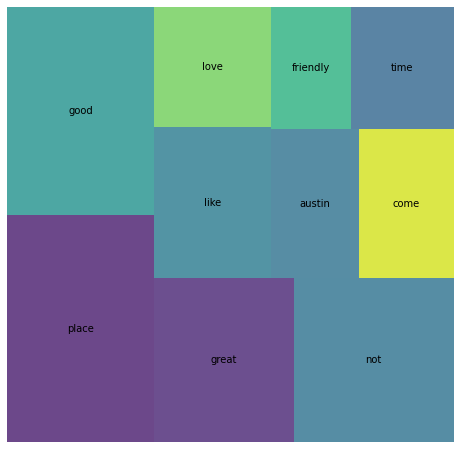

In [27]:
# Create dfs for good and bad reviews
df_good = df[df['good_bad'] == "Good"]
df_bad = df[df['good_bad'] == "Bad"]
wc_good = count(df_good['lemmas'])
wc_bad = count(df_bad['lemmas'])

# See a squarify word cloud (top 10) for the good reviews
wc_good_top05 = wc_good.sort_values(by='appears_in_pct', ascending=False)
wc_good_top05 = wc_good_top05.head(10)

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_good_top05['pct_total'], label=wc_good_top05['word'], alpha=.8 )
plt.axis('off')

In [28]:
#See top 5 rows of word count for good reviews
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
112,place,3515,5426,1.0,0.017583,0.017583,0.511050
166,good,3309,5001,2.0,0.016205,0.033788,0.481099
90,not,2622,4283,3.0,0.013879,0.047667,0.381215
65,great,2699,3740,4.0,0.012119,0.059786,0.392411
174,like,1967,2874,5.0,0.009313,0.069099,0.285984


(0.0, 100.0, 0.0, 100.0)

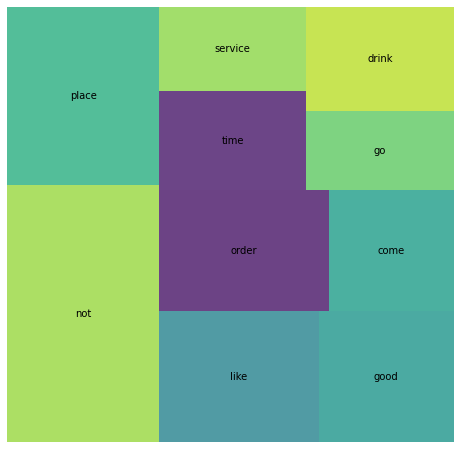

In [29]:
# See a squarify word cloud (top 10) for bad reviews
wc_bad_top05 = wc_bad.sort_values(by='appears_in_pct', ascending=False)
wc_bad_top05 = wc_bad_top05.head(10)

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_bad_top05['pct_total'], label=wc_bad_top05['word'], alpha=.8 )
plt.axis('off')

In [30]:
#See top 5 rows of word count for bad reviews
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
71,not,433,892,1.0,0.022899,0.022899,0.586721
32,place,373,618,2.0,0.015865,0.038764,0.505420
6,like,293,476,3.0,0.012220,0.050983,0.397019
97,order,250,465,4.0,0.011937,0.062920,0.338753
4,good,291,404,5.0,0.010371,0.073292,0.394309


From the above cells that there is a difference in top word count between good and bad reviews. I found some of the differences challenging to detect because of how complicated human language can be. For example, we break up 'not good' into 'not' and 'good', so good is not actually a sign of a good review (as it might be part of 'not good'). I guess I had expected them to be more opposite and polarizing.

The bad reviews seem to mention 'service' and 'time', so perhaps punctuality and time for food prep is really important. Whereas, good reviews seem to sow more affection for the location with 'Austin' and 'place', but some of these could probably be filtered out as stop or junk words.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

